## Objetivo deste Notebook

O notebook de Análise Exploratória de Dados tem como objetivo compreender o comportamento temporal e espacial da concentração de mancozebe no solo, bem como explorar de forma preliminar a relação com variáveis físico-químicas do solo, assegurando a coerência dos dados para a aplicação dos modelos cinéticos e de Machine Learning.

## Importação das Bibliotecas

In [1]:
import pandas as pd
im
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/mancozebe_experimental.csv")

## Análise Exploratória dos Dados

### 1. Concentração × Tempo (por profundidade)

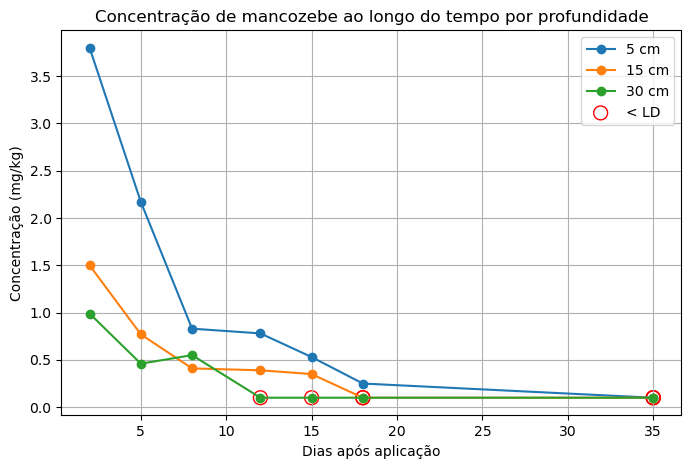

In [3]:
plt.figure(figsize=(8, 5))

for depth in sorted(df["profundidade_cm"].unique()):
    data = df[df["profundidade_cm"] == depth]
    
    plt.plot(
        data["dias"],
        data["concentracao_mg_kg"],
        marker="o",
        label=f"{depth} cm"
    )

# Destacando valores < LD
censored = df[df["censored"] == True]
plt.scatter(
    censored["dias"],
    censored["concentracao_mg_kg"],
    facecolors='none',
    edgecolors='red',
    s=100,
    label="< LD"
)

plt.xlabel("Dias após aplicação")
plt.ylabel("Concentração (mg/kg)")
plt.title("Concentração de mancozebe ao longo do tempo por profundidade")
plt.legend()
plt.grid(True)
plt.show()

#### Insight
A análise temporal da concentração de mancozebe por profundidade evidencia um comportamento de degradação consistente com modelos cinéticos clássicos, reforçando a importância de abordagens baseadas em conhecimento físico-químico em estudos ambientais de pequena escala.

### 2. Concentração × Profundidade (para tempos específicos)

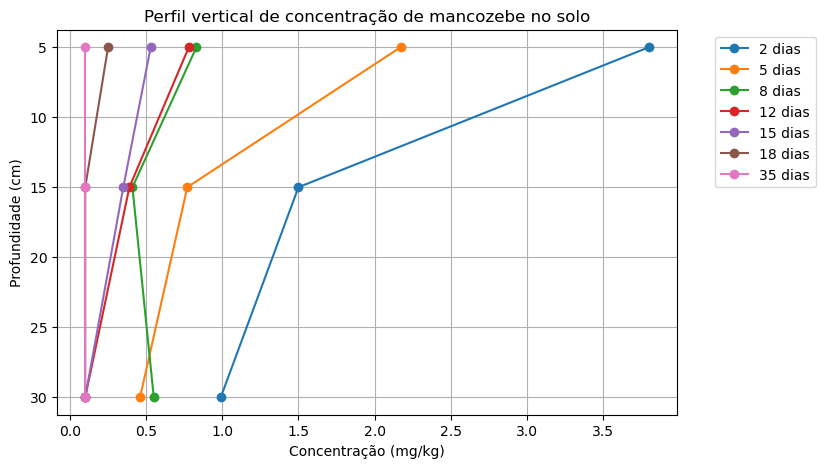

In [4]:
plt.figure(figsize=(8, 5))

for day in sorted(df["dias"].unique()):
    data = df[df["dias"] == day]
    
    plt.plot(
        data["concentracao_mg_kg"],
        data["profundidade_cm"],
        marker="o",
        label=f"{day} dias"
    )

plt.gca().invert_yaxis()
plt.xlabel("Concentração (mg/kg)")
plt.ylabel("Profundidade (cm)")
plt.title("Perfil vertical de concentração de mancozebe no solo")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

#### Insight
O perfil vertical de concentração do mancozebe evidencia um processo de lixiviação limitado e progressivamente atenuado pela degradação, reforçando a adequação de modelos cinéticos clássicos para a descrição do comportamento ambiental do fungicida

### 3. Boxplot da concentração por profundidade

<Figure size 700x500 with 0 Axes>

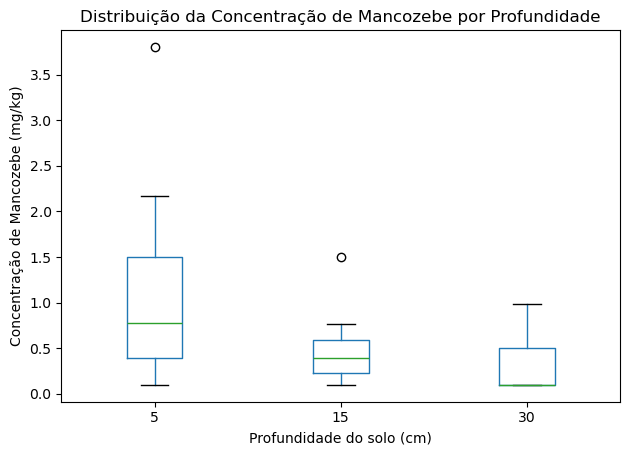

In [5]:
plt.figure(figsize=(7, 5))

df.boxplot(
    column="concentracao_mg_kg",
    by="profundidade_cm",
    grid=False
)

plt.xlabel("Profundidade do solo (cm)")
plt.ylabel("Concentração de Mancozebe (mg/kg)")
plt.title("Distribuição da Concentração de Mancozebe por Profundidade")
plt.suptitle("")  # remove título automático do pandas

plt.tight_layout()
plt.show()

#### Insight
Os tempos selecionados representam estágios iniciais, intermediários e finais do experimento, permitindo visualizar a evolução vertical da concentração ao longo do processo de degradação. Entre esses intervalos, espera-se uma transição gradual dominada pelos mesmos processos cinéticos observados no gráfico Concentração × Tempo.

O boxplot evidencia maior variabilidade da concentração nas camadas superficiais do solo, enquanto as camadas mais profundas apresentam valores menores e mais homogêneos. Esse comportamento é consistente com maior influência de processos ambientais e biológicos na superfície, além de indicar que o erro de modelagem tende a ser maior nas menores profundidades.

### 4. Relação concentração × umidade

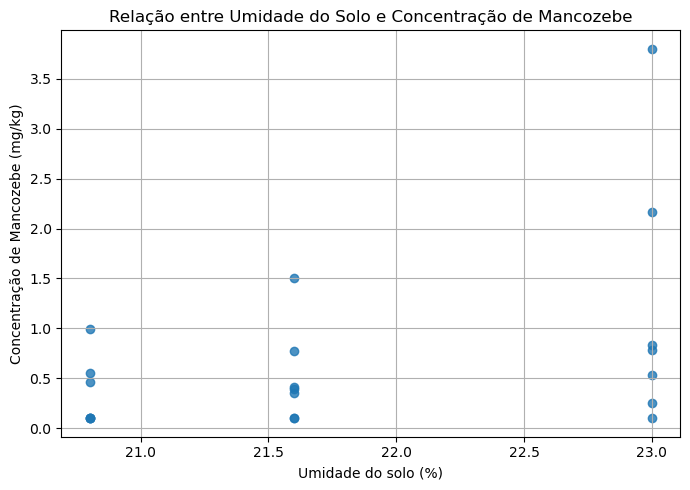

In [6]:
plt.figure(figsize=(7, 5))

plt.scatter(
    df["umidade"],
    df["concentracao_mg_kg"],
    alpha=0.8
)

plt.xlabel("Umidade do solo (%)")
plt.ylabel("Concentração de Mancozebe (mg/kg)")
plt.title("Relação entre Umidade do Solo e Concentração de Mancozebe")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Insight
Observa-se uma associação entre maiores teores de umidade do solo e maiores concentrações de mancozebe. Embora o gráfico não permita inferir causalidade, essa relação é fisicamente plausível, uma vez que a umidade pode influenciar a difusão e a disponibilidade do composto no sistema solo-solução.

### 5. Correlação entre variáveis (heatmap)

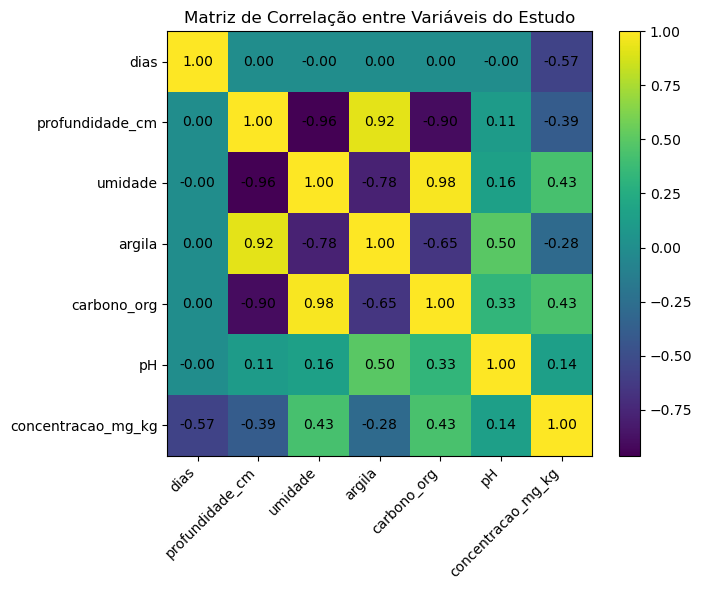

In [7]:
# Selecionar apenas variáveis numéricas relevantes
vars_corr = [
    "dias",
    "profundidade_cm",
    "umidade",
    "argila",
    "carbono_org",
    "pH",
    "concentracao_mg_kg"
]

corr_matrix = df[vars_corr].corr()

plt.figure(figsize=(8, 6))

im = plt.imshow(corr_matrix, interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.xticks(range(len(vars_corr)), vars_corr, rotation=45, ha="right")
plt.yticks(range(len(vars_corr)), vars_corr)

# Adicionar valores numéricos no mapa
for i in range(len(vars_corr)):
    for j in range(len(vars_corr)):
        plt.text(
            j, i,
            f"{corr_matrix.iloc[i, j]:.2f}",
            ha="center",
            va="center"
        )

plt.title("Matriz de Correlação entre Variáveis do Estudo")
plt.tight_layout()
plt.show()

#### Insight
A matriz de correlação evidencia forte correlação negativa entre o tempo e a concentração de mancozebe, refletindo o processo de degradação. As propriedades do solo, como umidade e carbono orgânico, apresentam correlações moderadas com a concentração, indicando seu papel como variáveis moduladoras do comportamento do fungicida. Esses resultados justificam a inclusão dessas variáveis nos modelos de Machine Learning, bem como a comparação com o modelo cinético clássico. A variável areia não foi incluida, para evitar colinearidade.

### 6. Concentração × Tempo (escala log)

In [8]:
# Evitar problemas com log(0)
df_log = df[df["concentracao_mg_kg"] > 0].copy()

plt.figure(figsize=(8, 5))

for profundidade in df_log["profundidade_cm"].unique():
    subset = df_log[df_log["profundidade_cm"] == profundidade]
    plt.scatter(
        subset["dias"],
        np.log(subset["concentracao_mg_kg"]),
        label=f"{profundidade} cm"
    )

plt.xlabel("Tempo (dias)")
plt.ylabel("ln(Concentração de Mancozebe)")
plt.title("Linearização da Degradação do Mancozebe (Escala Logarítmica)")
plt.legend(title="Profundidade")
plt.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

<Figure size 800x500 with 0 Axes>

#### Insight
A linearização da concentração em escala logarítmica evidencia um comportamento aproximadamente linear ao longo do tempo nas camadas mais superficiais do solo, onde as concentrações se mantêm acima do limite de detecção. Em profundidades maiores, a predominância de valores próximos ou abaixo do LD resulta em pontos aproximadamente constantes em escala logarítmica, refletindo limitações analíticas e censura de dados, ou seja, a cinética é observável onde o sistema fornece informação suficiente. Onde o método analítico impõe limites, o modelo passa a refletir o experimento, não o processo físico-químico.

### 7. Distribuição das Concentrações

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df["concentracao_mg_kg"], bins=10)
plt.xlabel("Concentração (mg/kg)")
plt.ylabel("Frequência")
plt.title("Distribuição das concentrações de mancozebe")
plt.show()

#### Insight
A distribuição assimétrica das concentrações evidencia a predominância de valores residuais ao longo do experimento, característica típica de processos de degradação ambiental e um fator limitante para abordagens puramente baseadas em dados.